#mtcars 데이터셋 분석하기

In [ ]:
!pip install pandas
!pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mtcars.csv")

### 다음 DataFrame methods을 사용해서 데이터셋의 결과를 출력하세요.
- head, tail
- shape method를 이용해서 데이터의 갯수 (row count)를 출력하세요.
- columns: 데이터셋의 컬럼 중 이름이 없는 컬럼을 찾아서 적합한 이름으로 변경하세요.
- info, dtypes
- describe

In [3]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
print(df.shape) # (행, 열)
print(df.shape[0])

(32, 12)
32


In [5]:
# 1. 컬럼 확인
print(df.columns)

# 2. 이름 없는 컬럼 찾기
unnamed_cols = [col for col in df.columns if 'Unnamed' in str(col)]

# 3. 내용 확인
print(df[unnamed_cols].head())

# 4. 이름 변경
df = df.rename(columns={'Unnamed: 0': 'car_name'})

# 5. 컬럼 확인
print(df.columns)

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')
          Unnamed: 0
0          Mazda RX4
1      Mazda RX4 Wag
2         Datsun 710
3     Hornet 4 Drive
4  Hornet Sportabout
Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     int64  
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  gear      32 non-null     int64  
 11  carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp            int64
drat        float64
wt          float64
qsec        float64
vs            int64
am            int64
gear          int64
carb          int64
dtype: object

In [8]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### gear, transmission features에는 각각 몇가지 값이 있는지를 출력하세요.

In [9]:
print("gear 고유값 개수:", df['gear'].nunique())
print("transmission(am) 고유값 개수:", df['am'].nunique())

gear 고유값 개수: 3
transmission(am) 고유값 개수: 2


In [10]:
df[['gear', 'am']].nunique()

gear    3
am      2
dtype: int64

In [11]:
print("gear 값 분포")
print(df['gear'].value_counts())

print("\ntransmission(am) 값 분포")
print(df['am'].value_counts())

gear 값 분포
gear
3    15
4    12
5     5
Name: count, dtype: int64

transmission(am) 값 분포
am
0    19
1    13
Name: count, dtype: int64


### gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지를 알아내세요.
- 먼저 결과값을 화면에 출력하세요.
- 결과값을 바 그래프로 그리세요. 타이틀은 '# of Cars by Gear x Transmission'로, x축 레이블은 '(Gear, Auto Transmission)', y축 레이블은 '# of Cars'로 만드세요.

In [12]:
result = df.groupby(['gear', 'am']).size().reset_index(name='count')
print(result)

   gear  am  count
0     3   0     15
1     4   0      4
2     4   1      8
3     5   1      5


In [13]:
counts = df.groupby(['gear', 'am']).size()
print(counts)

gear  am
3     0     15
4     0      4
      1      8
5     1      5
dtype: int64


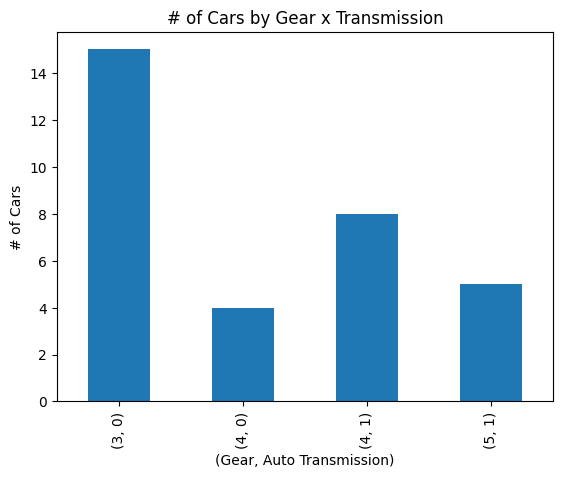

In [14]:
plt.figure()

counts.plot(kind='bar')

plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')

plt.show()

### 데이터셋에 포함된 모든 features의 히스토그램을 그리세요.
- 그래프 타이틀은 "Histograms of Variables"로 하세요.
- 최대한 잘 보이도록 그래프들을 배치하세요.

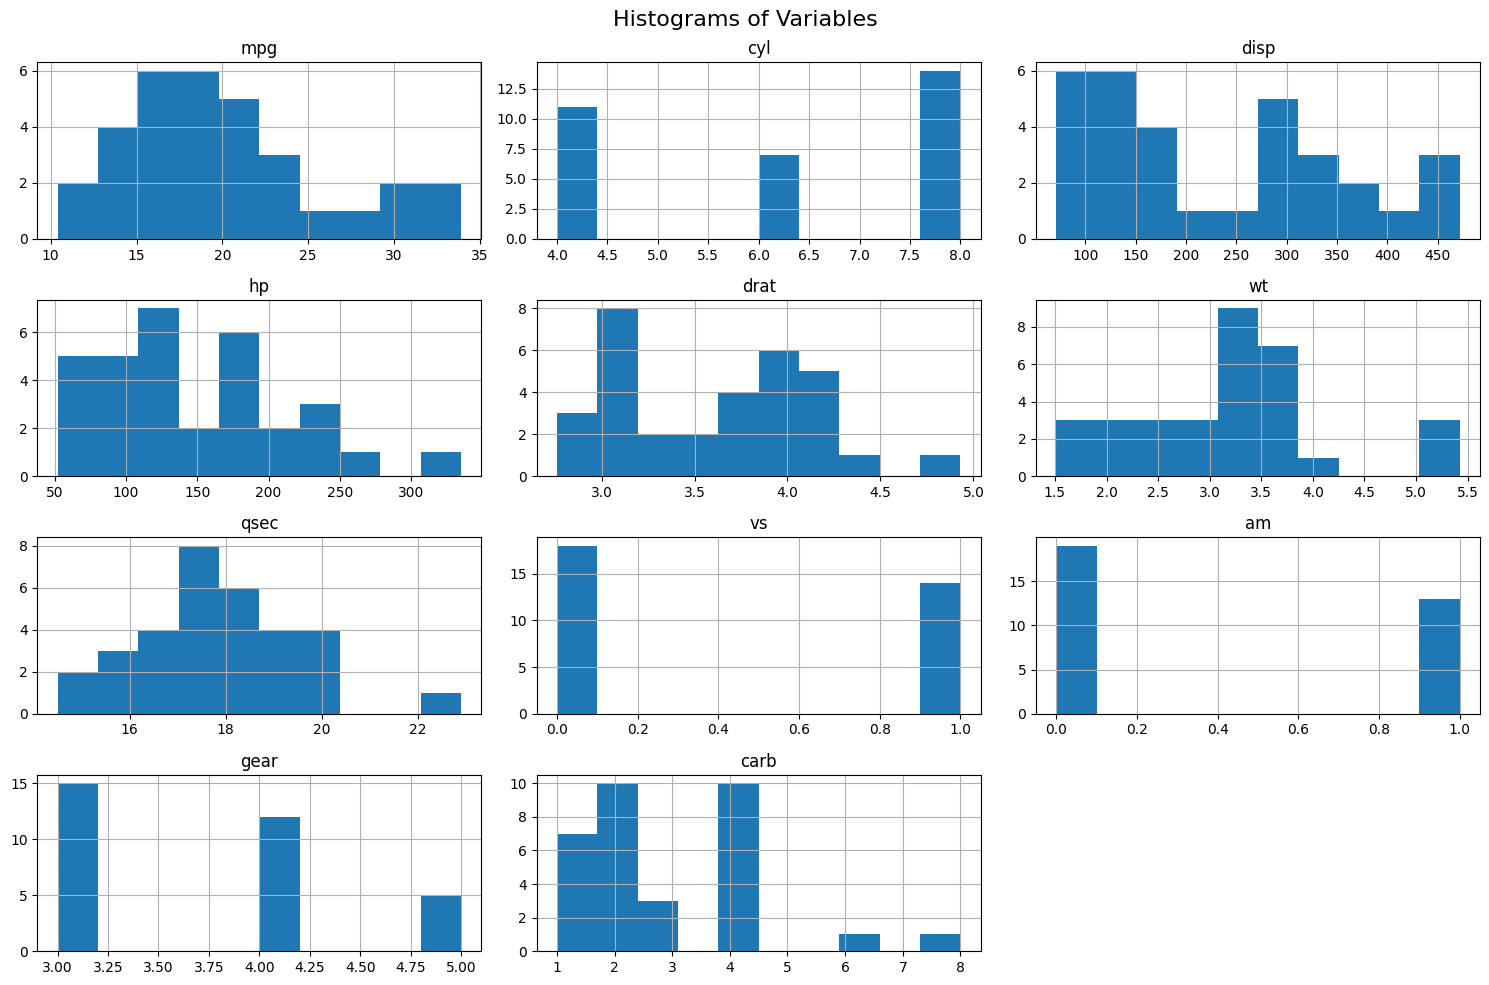

In [15]:
df.hist(figsize=(15, 10), bins=10)

plt.suptitle("Histograms of Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

### Cylinder와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리세요.
- 그래프 타이틀은 "Cylinder vs Horse Power"로 하세요.

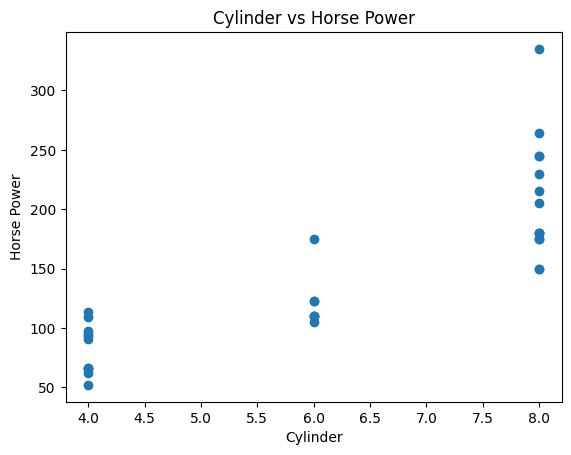

In [16]:
plt.figure()
plt.scatter(df['cyl'], df['hp'])

plt.title("Cylinder vs Horse Power")
plt.xlabel("Cylinder")
plt.ylabel("Horse Power")

plt.show()

### MPG와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리세요.
- 그래프 타이틀은 "MPG vs Horse Power"로 하세요.

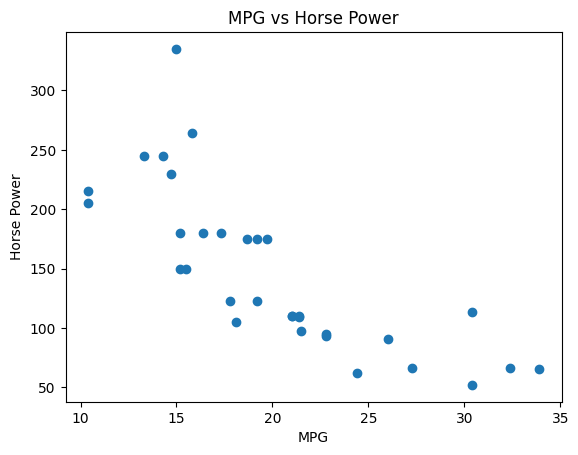

In [17]:
plt.figure()
plt.scatter(df['mpg'], df['hp'])

plt.title("MPG vs Horse Power")
plt.xlabel("MPG")
plt.ylabel("Horse Power")

plt.show()

### 각 변수들 간의 상관 관계를 알아 보기 위해 상관계수를 구하는 표를 출력하세요.

In [18]:
corr_table = df.select_dtypes(include='number').corr()
print(corr_table)


           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  